#### Building k-NN model steps
1. Generate training data
2. Create k-NN object for a given number k
3. Find the k nearest neighbors of a new data point that we want to classify
4. Assign class label of the new data point by majority vote
5. Plot result

In [3]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
plt.style.use('ggplot')

#### 1. Generating the training data

Fix the seed

In [5]:
np.random.seed(42)

Assume town map spans range 0 <= x < 100 and 0 <= y < 100.   
Create function that generates random data points on map

In [8]:
def generate_data(num_samples, 
                    num_features = 2, 
                    low = 0, 
                    high = 100):
    data_size = (num_samples, num_features)
    data = np.random.randint(low, high, data_size)
    
    labels_size = (num_samples, 1)
    labels = np.random.randint(0, 2, labels_size)
    
    return data.astype(np.float32), labels

In [11]:
train_data, labels = generate_data(10)
print('Training data: ', train_data)
print('Training labels: ', labels)

Training data:  [[ 53.   3.]
 [ 53.  92.]
 [ 62.  17.]
 [ 89.  43.]
 [ 33.  73.]
 [ 61.  99.]
 [ 13.  94.]
 [ 47.  14.]
 [ 71.  77.]
 [ 86.  61.]]
Training labels:  [[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]]


Plot data

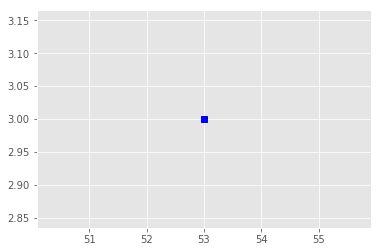

In [18]:
plt.plot(train_data[0,0], train_data[0,1], 'bs')

Write function to visualize entire training set (blue squares and red triangles)

In [26]:
def plot_data(all_blue, all_red):
    plt.scatter(all_blue[:,0], all_blue[:,1], c='b', marker='s', s=100)
    plt.scatter(all_red[:,0], all_red[:,1], c='r', marker='v', s=100)
    plt.xlabel('x coordinate (feature 1)')
    plt.ylabel('y coordinate (feature 2)')

Test the function using the dataset

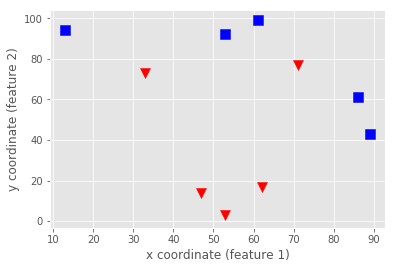

In [27]:
all_blue = train_data[labels.ravel() == 0]
all_red = train_data[labels.ravel() == 1]
plot_data(all_blue, all_red)